In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


**Task 2.1**

In this section, the original data set and labels are loaded from files ,visualize on a 2-D scatter plot and color using true labels provided.



In [3]:
data = np.load('Iris_data.npy')
labels = np.load('Iris_labels.npy')

print(f'Shape of the data : {data.shape}')
print(f'Shape of the labels : {labels.shape}')


Shape of the data : (150, 4)
Shape of the labels : (150,)


Number of Samples : 150

Number of Features : 4

* Sepal Length (1st column)
* Sepal Width (2nd column)
* Petal Length (3rd column)
* Petal Width (4th column)

Number of Categories(Flower Species) : 3

* Iris Setosa (label = 0)
* Iris Versicolor (label = 1)
* Iris Virginica (label = 2)

The provided data file(Iris_data.npy) contains above four features for 150 samples(150 by 4 matrix).

* Row : Data point(150)
* Column : Features(4) 

The provided label file(Iris_labels.npy) contains labels which represent the type of flower(0: Setosa, 1: Versicolor, 2: Virginica) for all data samples provided in the data file(150 by 1 matrix). 

* Row : Data point(150)
* Column : Type of flower(1)

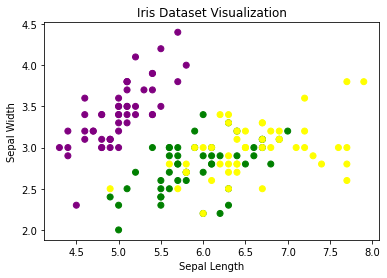

In [4]:
plt.figure()

plt.title('Iris Dataset Visualization')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

colors = np.array(['purple', 'green', 'yellow'])
legends = np.array(['purple', 'green', 'yellow'])

scatter = plt.scatter(data[:, 0], data[:, 1], c = colors[labels])

plt.show()



**Task 2.2** : K - Means Clustering

In this section, the Iris data set is clustered using K-means algorithm. The parameters passed to the KMeans object are tuned to make more robust and accurate model.

* init = 'k-means++' (Force to select initial centroids in a more powerful way to speed up convergence)

* n_init = 20 ( The algorithm is executed 20 times with different centroid seeds and select the best one as the output)

This value should be selected more carefully.
* Small value : Lower accuracy
* Higher value : More time


Cluster centers :
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Predicted Lables(Cluster Membership) :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

Original Labels(True Labels) :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



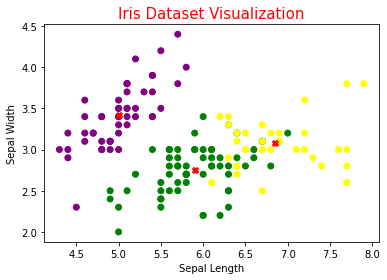

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 20, random_state = 0).fit(data)
# init : initial centroid selection method, n_init : number of initial centroid selection

print(f'Cluster centers :\n{kmeans.cluster_centers_}\n')
print(f'Predicted Lables(Cluster Membership) :\n{kmeans.labels_}\n')
print(f'Original Labels(True Labels) :\n{labels}\n')

# Visualize in 2D plane
plt.figure()
plt.title(label = 'Iris Dataset Visualization', fontsize = 15, color = 'r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

colors = np.array(['green', 'purple', 'yellow'])
plt.scatter(data[:, 0], data[:, 1], c = colors[kmeans.labels_])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker = 'X')
plt.show()


**Task 2.3** : GMM 

In this section, the Iris data set is clustered using GMM(Gaussian Mixture Model) algorithm. In the first part, the data set is fitted to a GMM model and predict cluster membership.

Note : Parameters of each gaussian distribution(mean, variance, prior probabilities) can be initialized mainly in two different ways and it can also be configured using **init_params** parameter passed to the model.

* init_params = 'kmeans' : Initialize using kmeans algorithm
* init_params ='random' : Initialize randomly

GMM Means :
[[5.91697517 2.77803998 4.20523542 1.29841561]
 [5.006      3.418      1.464      0.244     ]
 [6.54632887 2.94943079 5.4834877  1.98716063]]

Predictions (Cluster Membership) :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Original Labels (True Labels) :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



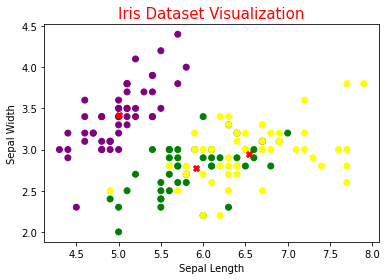

In [6]:
gm = GaussianMixture(n_components=3, max_iter = 50, n_init = 10, init_params = 'kmeans', random_state=0).fit(data)
print(f'GMM Means :\n{gm.means_}\n')

y = gm.predict(data)
print(f'Predictions (Cluster Membership) :\n{y}\n')
print(f'Original Labels (True Labels) :\n{labels}\n')

# Visualize in 2D plane
plt.figure()
plt.title(label = 'Iris Dataset Visualization', fontsize = 15, color = 'r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

colors = np.array(['green', 'purple', 'yellow'])
plt.scatter(data[:, 0], data[:, 1], c = colors[y])
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], color='red', marker = 'X')
plt.plot()
plt.show()


# TODO : Need to compare


In the second part, posterior probabilities are retrieved with respect to each distributions and visualize on different scatter plots.

Note : Each column represent posterior probabilities with respect to single distribution(3 columns ->> 3 distributions ).

GMM components shape :
(150, 3)

Gaussian Component Range(P(x|J) where J = 1, 2, 3) :
Min : 7.323192069581473e-272
Max : 1.0



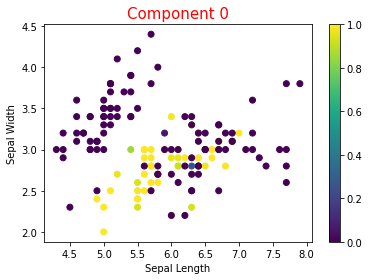

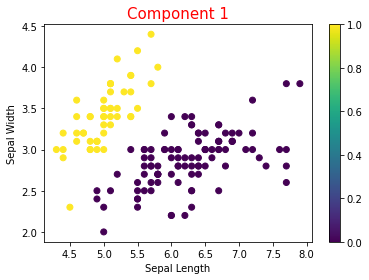

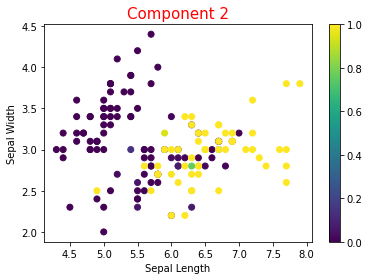

In [7]:
gm_components = gm.predict_proba(data)
print(f'GMM components shape :\n{gm_components.shape}\n')

min = np.amin(gm_components)
max = np.amax(gm_components)
print(f'Gaussian Component Range(P(x|J) where J = 1, 2, 3) :\nMin : {min}\nMax : {max}\n')


plt.figure()
plt.title(label = 'Component 0', fontsize = 15, color = 'r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(data[:, 0], data[:, 1], c = gm_components[:, 0], cmap='viridis', vmin = 0, vmax = 1 )
plt.colorbar()
plt.show()

plt.figure()
plt.title(label = 'Component 1', fontsize = 15, color = 'r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(data[:, 0], data[:, 1], c = gm_components[:, 1], cmap='viridis', vmin = 0, vmax = 1 )
plt.colorbar()
plt.show()

plt.figure()
plt.title(label = 'Component 2', fontsize = 15, color = 'r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(data[:, 0], data[:, 1], c = gm_components[:, 2], cmap='viridis', vmin = 0, vmax = 1 )
plt.colorbar()
plt.show()

**Task 2.4**

In this section, one of the above clustering algorithm is used to find the number of underlying clusters in an unsean data set. Two main techniques are used to measure the accuracy of model and predict the number of clusters.

* Sum of Square Error
* Silhouette Score (Maximum inter-cluster distance and minimum intra-cluster distance.

The most accurate model is one that has lower SSE or higher Silhoutte score.

Data Shape :  (100, 10)


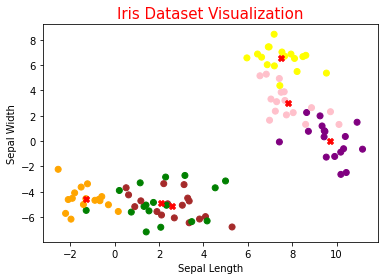

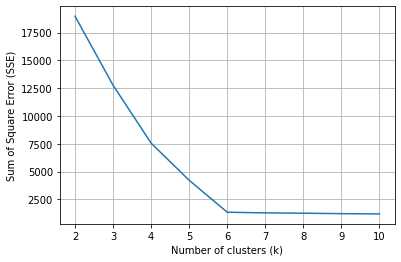

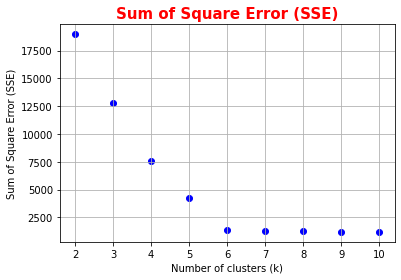

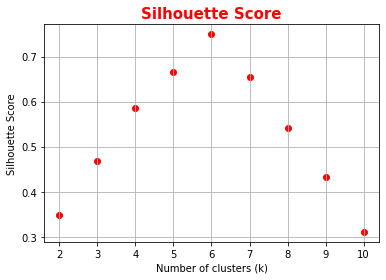

In [18]:
data = np.load('task2_4.npy')
print('Data Shape : ',data.shape)


sse_array = np.zeros(shape = (10,1))
inertias = []
for k in range(2, 11) :
  kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

  sse = 0
  for index in range(0, data.shape[0]) :
    point = data[index]
    center = kmeans.cluster_centers_[kmeans.labels_[index]]
    dif = point - center
    sse += np.dot(dif, np.transpose(dif))
  sse_array[k-1] = sse


silhouette_array = np.zeros(shape = (10,1))
for k in range(2, 11) :
  kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0).fit(data)
  score = silhouette_score(data, kmeans.labels_)
  silhouette_array[k-1] = score

plt.figure()
plt.title(label = 'Iris Dataset Visualization', fontsize = 15, color = 'r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

colors = np.array(['green', 'purple', 'yellow', 'orange','pink', 'brown'])
kmeans = KMeans(n_clusters = 6, init = 'k-means++', n_init = 20, random_state = 0).fit(data)
plt.scatter(data[:, 0], data[:, 1], c = colors[kmeans.labels_])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker = 'X')
plt.show()

plt.figure()
plt.plot(np.array(range(2, 11)), inertias)
plt.title(label = 'Sum of Square Error (SSE)', color = 'r', fontsize = 15, fontweight='bold')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Square Error (SSE)')
plt.grid()
plt.show()

plt.show()

plt.figure()
plt.scatter( np.array(range(2, 11)), sse_array[1: 10], c = 'blue')
plt.title(label = 'Sum of Square Error (SSE)', color = 'r', fontsize = 15, fontweight='bold')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Square Error (SSE)')
plt.grid()
plt.show()


plt.figure()
plt.scatter( np.array(range(2, 11)), silhouette_array[1: 10], c = 'red')
plt.title(label = 'Silhouette Score', color = 'r', fontsize = 15, fontweight='bold')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


According to the above graphs, the number of underlying clusters in this data set is **6** because it has the lowest error as well as highest **Silhouette Score**.